# 03 Probability and Distributions

## 01 Basic Concepts

### 1. Random Sampling(임의 추출)

In [2]:
# sampling without replacement
sample(1:40, 5)

[1]  6 16  2 24 13

In [3]:
# sampling with replacement
sample(c('H','T'), 10, replace=T)

[1] "T" "H" "H" "H" "T" "H" "T" "T" "T" "H"

In [4]:
# sampling with prob(*)
sample(c('succ', 'fail'), 10, replace=T, prob=c(0.9, 0.1))

[1] "succ" "succ" "succ" "fail" "fail" "succ" "succ" "succ" "succ" "succ"

### 2. Prob. Calculations and Combinatorics

순열(Permutation) 및 조합(Combination)

<img src="https://latex.codecogs.com/svg.image?_nC_r=\frac{_nP_r}{r!}=\frac{n!}{r!(n-r)!}\;\;\;\begin{pmatrix}n\\r\end{pmatrix}"> 로도 표현

In [5]:
# The probability to choose 5 numbers out of 40
prod(5:1)/prod(40:36)

[1] 1.519738e-06

In [6]:
1/choose(40,5)

[1] 1.519738e-06

### 3. Discrete distributions(이산형 분포)

binomial distributions(이항분포)

*X ~ b(n,p)*

<img src="https://latex.codecogs.com/svg.image?&space;f(x)=\binom{n}{x}p^x(1-p)^{n-x}">

### 4. Continuous Distributions(연속형 분포)

Normal distributions(정규 분포)

<img src="https://latex.codecogs.com/svg.image?X\sim&space;N(\mu,\sigma^2)"> <br>

<img src="https://latex.codecogs.com/svg.image?f(x)=\frac{1}{\sqrt{2\pi\sigma}}\cdot&space;exp(-\frac{(x-\mu)^2}{2\sigma^2})">


### 5. The built-in distributions in R

- Density or point probability
- Comulated probability, distibution function
- Quantiles
- Pseudo-random numbers

※ For the normal distribution, these are named dnorm, pnorm, qnorm, and rnorm(density, probability, quantile, and random respectively)

#### Densities

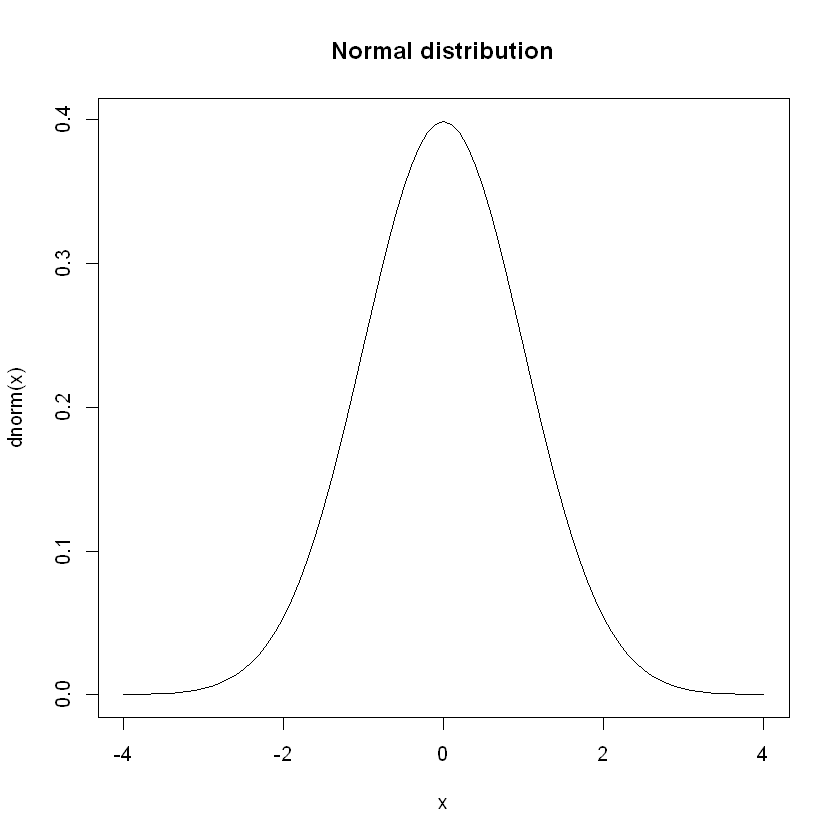

In [7]:
# Normal distribution

x <- seq(-4, 4, 0.1)
plot(x, dnorm(x), type='l')
title("Normal distribution")

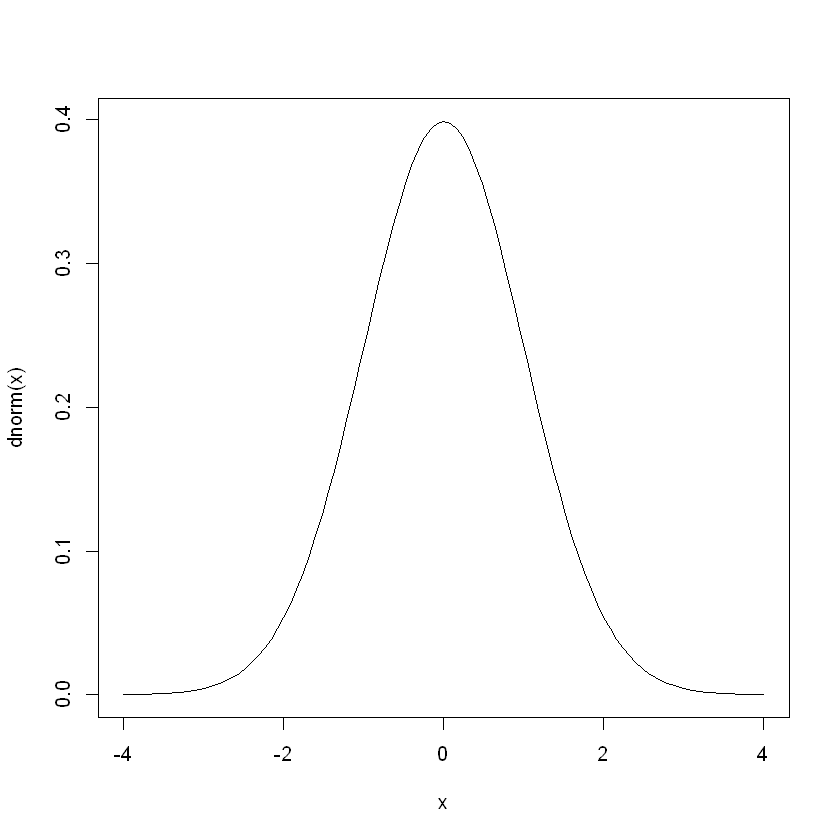

In [8]:
# 다른 방법
curve(dnorm(x), from=-4, to=4)

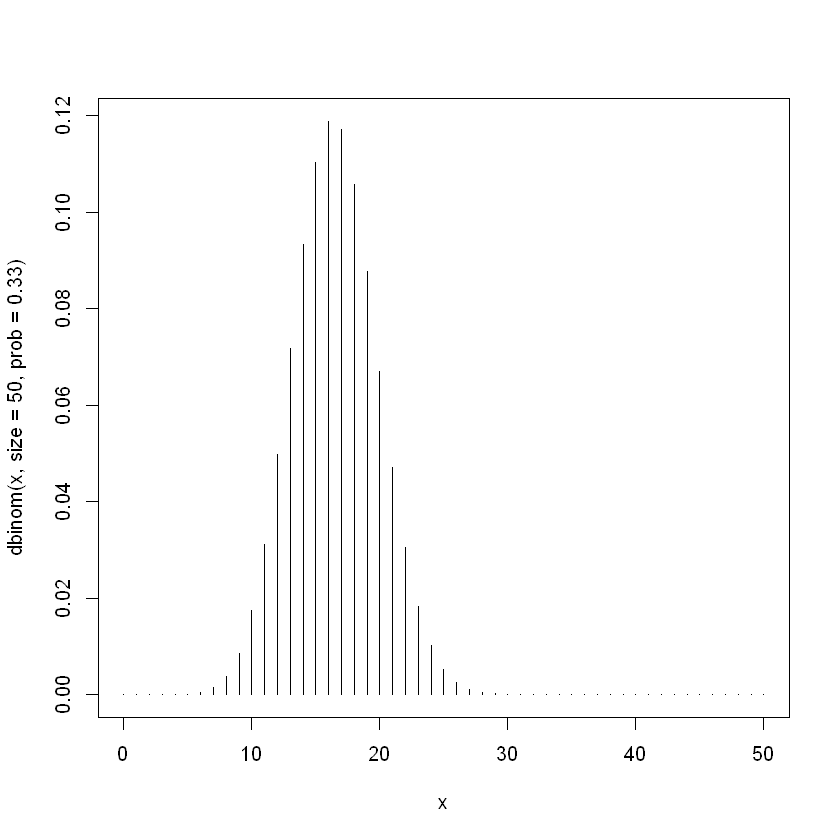

In [9]:
# Binomial distribution
x <- 0:50
plot(x, dbinom(x, size=50, prob=.33), type='h')

#### Cumulative distribution functions

- Normal distribution

<img src="https://latex.codecogs.com/svg.image?X\sim&space;N(132,13^2)"> <br>

Calcalate Pr(X ≥ 160)

In [10]:
1-pnorm(160, mean=132, sd=13)


[1] 0.01562612

- Binomial distribution

Twenty patients are given two treatments each and then asked whether treatment A or B worked better. It turned out that 16 patient liked A better. The question is the whether this can be taken as sufficient evidence that A actually is the better treatment or whether the outcome might as well have happened by chance even if the treatments were equally good.

X ~ b(20, 0.5)

<img src="https://latex.codecogs.com/svg.image?H_0:p=0.5"><br>
<img src="https://latex.codecogs.com/svg.image?H_1:p>0.5"><br>
<br>
<img src="https://latex.codecogs.com/svg.image?p-value=P(X\geq&space;16|H_0=1-P(X\leq&space;15)">



In [11]:
1-pbinom(15, size=20, prob=0.5)

[1] 0.005908966

#### Quantiles(백분위수)

- The quantile function is the inverse of the cumulative distribution function. The p-quantile is the value with the property that there is probability p of getting a value less than or equal to it. the median is by definition the 50% quantile.

- 95% CI for μ

<center>
<img src="https://latex.codecogs.com/svg.image?\bar{x}&plus;\sigma/\sqrt(n)\times&space;N_{0.025}\leq\mu\leq\bar{x}&plus;\sigma/\sqrt(n)\times&space;N_{0.975}">
</center>

where <img src="https://latex.codecogs.com/svg.image?N_{0.025}"> is the 2.5% quantile in the normal distribution.

In [12]:
xbar <- 83
sigma <- 12
n <- 5
sem <- sigma/sqrt(n)
sem
xbar + sem*qnorm(0.025)
xbar + sem*qnorm(0.975)

[1] 5.366563

[1] 72.48173

[1] 93.51827

#### Random numbers

In [13]:
rnorm(10)
rnorm(10, mean=7, sd=5)
rbinom(10, size=20, prob=0.5)

[1]  1.2517799  0.7490240  1.0608835 -0.3872462  0.2583635 -0.4765737
 [7] -1.9526462  1.6730280  1.9763928 -0.1928342

[1] -2.1080232  9.7379107  8.9103281  9.5343469  5.5613361  5.4321372
 [7]  3.3672443  4.6095823  6.3760956  0.5668763

[1]  6  9  8 11  9  7 10 10  6 11

## 02 Descriptive Statistics and Graphics(기술통계와 그래프)

### 1. Summary statistics for a single group

#### Calculate the mean, standard deviation, variance, and median

In [14]:
x <- rnorm(50)
mean(x)
sd(x)
var(x)
median(x)
quantile(x)

pvec <- seq(0,1,0.1)
quantile(x, pvec)

[1] -0.0710443

[1] 1.040791

[1] 1.083246

[1] 0.01391882

0%         25%         50%         75%        100% 
-2.42832293 -0.70964203  0.01391882  0.61928949  2.10563250

0%         10%         20%         30%         40%         50% 
-2.42832293 -1.64453805 -0.92502453 -0.51158364 -0.31669494  0.01391882 
        60%         70%         80%         90%        100% 
 0.21906036  0.51845290  0.81435310  1.23368844  2.10563250

- In case there are missing values in data (1)

In [15]:
library(ISwR)
data(juul)
head(juul)
# '앞으로는 juul data를 쓸거야' 선언
attach(juul)
mean(igf1)
# na.rm -> NA를 Remove하고 계산
mean(igf1, na.rm=T)
sum(!is.na(igf1))
summary(igf1)

Warning message:
"패키지 'ISwR'는 R 버전 4.3.3에서 작성되었습니다"


,age,menarche,sex,igf1,tanner,testvol
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,NA,NA,NA,90,NA,NA
2,NA,NA,NA,88,NA,NA
3,NA,NA,NA,164,NA,NA
4,NA,NA,NA,166,NA,NA
5,NA,NA,NA,131,NA,NA
6,0.17,NA,1,101,1,NA


[1] NA

[1] 340.168

[1] 1018

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   25.0   202.2   313.5   340.2   462.8   915.0     321 

- In case there are missing values in data (2)

In [16]:
summary(juul)
detach(juul)
juul$sex <- factor(juul$sex, labels=c('M', 'F'))
juul$menarche <- factor(juul$menarche, labels=c('No', 'Yes'))
juul$tanner <- factor(juul$tanner, labels=c('I', 'II', 'III', 'IV', 'V'))
attach(juul)

      age            menarche          sex             igf1      
 Min.   : 0.170   Min.   :1.000   Min.   :1.000   Min.   : 25.0  
 1st Qu.: 9.053   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:202.2  
 Median :12.560   Median :1.000   Median :2.000   Median :313.5  
 Mean   :15.095   Mean   :1.476   Mean   :1.534   Mean   :340.2  
 3rd Qu.:16.855   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:462.8  
 Max.   :83.000   Max.   :2.000   Max.   :2.000   Max.   :915.0  
 NA's   :5        NA's   :635     NA's   :5       NA's   :321    
     tanner        testvol      
 Min.   :1.00   Min.   : 1.000  
 1st Qu.:1.00   1st Qu.: 1.000  
 Median :2.00   Median : 3.000  
 Mean   :2.64   Mean   : 7.896  
 3rd Qu.:5.00   3rd Qu.:15.000  
 Max.   :5.00   Max.   :30.000  
 NA's   :240    NA's   :859     

In [17]:
summary(juul)

# use transform
juu2 <- transform(juul,
        sex=factor(sex, labels=c('M', 'F')),
        menarche=factor(menarche, labels=c('No', 'Yes')),
        tanner=factor(tanner, labels=c('I', 'II', 'III', 'IV', 'V')))

      age         menarche     sex           igf1        tanner   
 Min.   : 0.170   No  :369   M   :621   Min.   : 25.0   I   :515  
 1st Qu.: 9.053   Yes :335   F   :713   1st Qu.:202.2   II  :103  
 Median :12.560   NA's:635   NA's:  5   Median :313.5   III : 72  
 Mean   :15.095                         Mean   :340.2   IV  : 81  
 3rd Qu.:16.855                         3rd Qu.:462.8   V   :328  
 Max.   :83.000                         Max.   :915.0   NA's:240  
 NA's   :5                              NA's   :321               
    testvol      
 Min.   : 1.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 7.896  
 3rd Qu.:15.000  
 Max.   :30.000  
 NA's   :859     

### 2. Graphics Display of Distributions (분포의 시각화)

#### Histograms

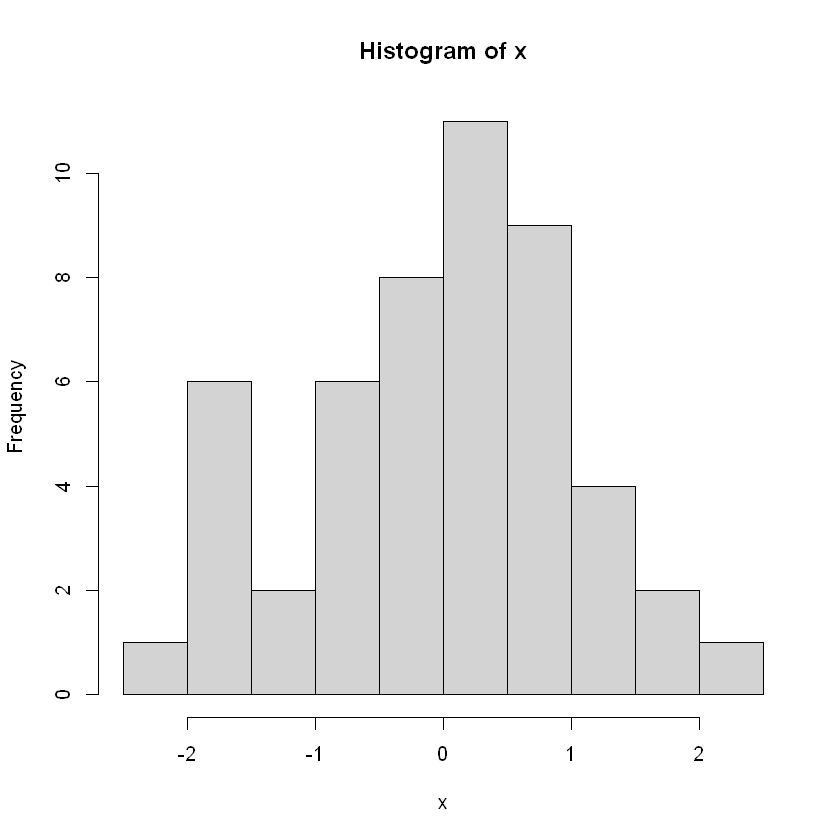

In [18]:
hist(x)

- Histogram using breaks=n

ex) Altman(1991): accident rates by age group are given as a count in age groups 0-4, 5-9, 10-15, 16, 17, 18-19, 20-24, 25-59, and 60-79 years of age

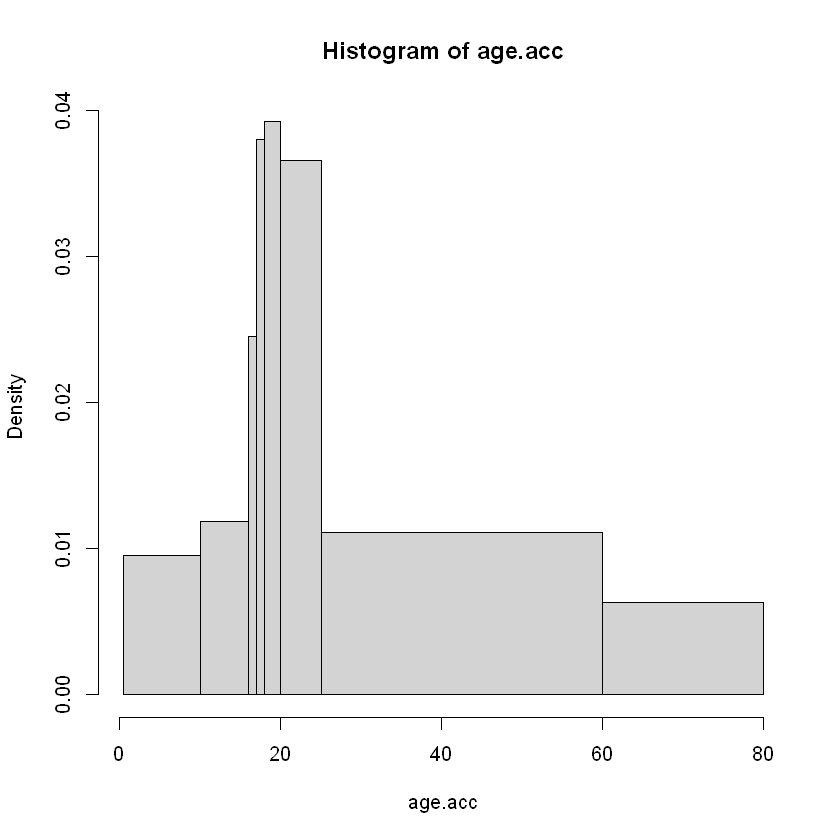

In [19]:
mid.age <- c(2.5, 7.5, 13, 16.5, 17.5, 19, 22.5, 44.5, 70.5)
acc.count <- c(28, 46, 58, 20, 31, 64, 149, 316, 103)
age.acc <- rep(mid.age, acc.count)
brk <- c(0.5, 10, 16, 17, 18, 20, 25, 60, 80)
hist(age.acc, breaks=brk)

#### Empirical cumulative distribution(경험적 누적 분포)

Definition:

<img src="https://latex.codecogs.com/svg.image?\hat{F}_n(x)=\frac{number\;of\;elements\;in\;the\;sample\leq&space;x}{n}=\frac{\sum_{i=1}^{n}I(X,\leq&space;x)}{n}">

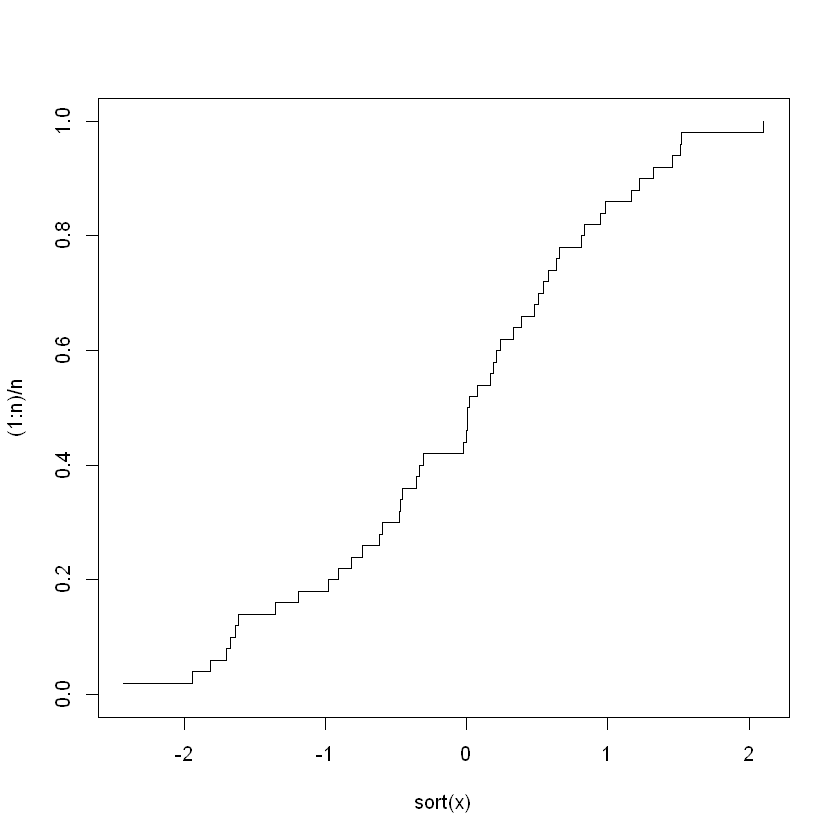

In [20]:
n <- length(x)
plot(sort(x), (1:n)/n, type='s', ylim=c(0,1))

#### Q-Q plots(quantile versus quantile plots) (분위수-분위수 그래프)

- One purpose of calculating the empirical cumulative distribution function(c.d.f) is to see whether data can be assumed normally distributed.
- 경험적 누적 분포 함수(c.d.f)를 계산하는 한 가지 목적은 데이터가 정규 분포를 따를 수 있는지 확인하는 것입니다.
<br><br>
- For a better assessment, you might plot the k-th smallest observation against the expected value of the k-th smallest observation out of n in a standard normal distribution.
- 더 나은 평가를 위해, 당신은 k번째로 작은 관측값을 표준 정규 분포에서의 n개 관측값 중에서 k번째로 작은 관측값의 예상 값과 비교할 수 있습니다.
<br><br>
- The point is that in this way you would expect to obtain a straight line if data come from a normal distribution with any mean and standard deviation.
- 이 방법을 통해, 데이터가 어떤 평균과 표준 편차를 갖는 정규 분포에서 온다면 기대되는 대로 직선을 얻을 것으로 예상됩니다.

⇒ 주어진 데이터가 정규분포를 따른다면 Q-Q plots은 직선형태를 띠게 됩니다.

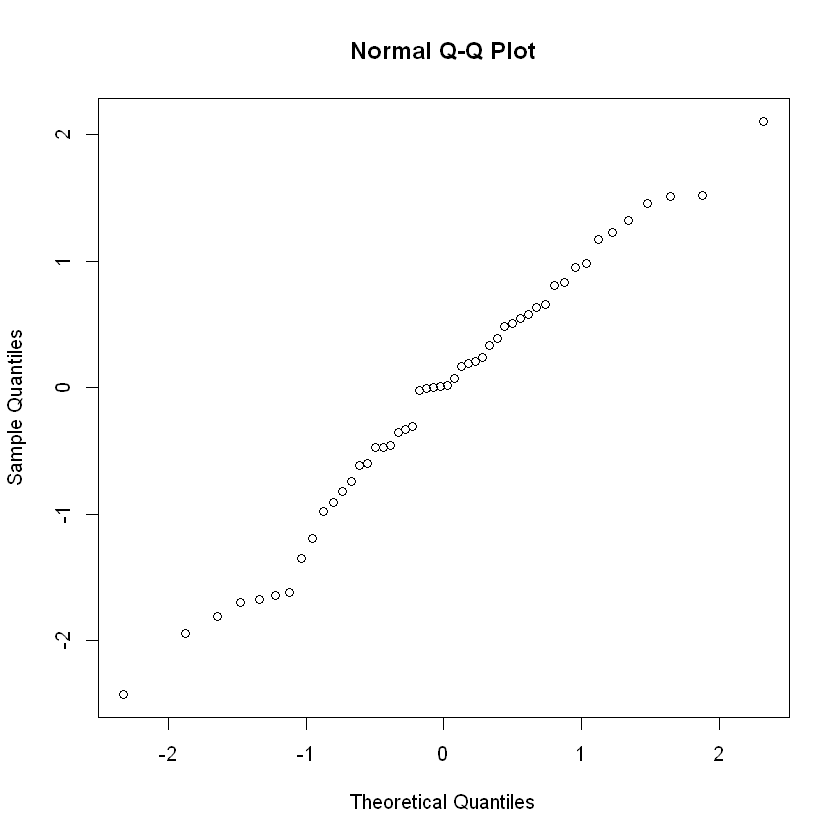

In [21]:
qqnorm(x)

#### Boxplots

- A "boxplot", or more descriptively a "box-and-whiskers plot", is a graphical summary of a distribution.

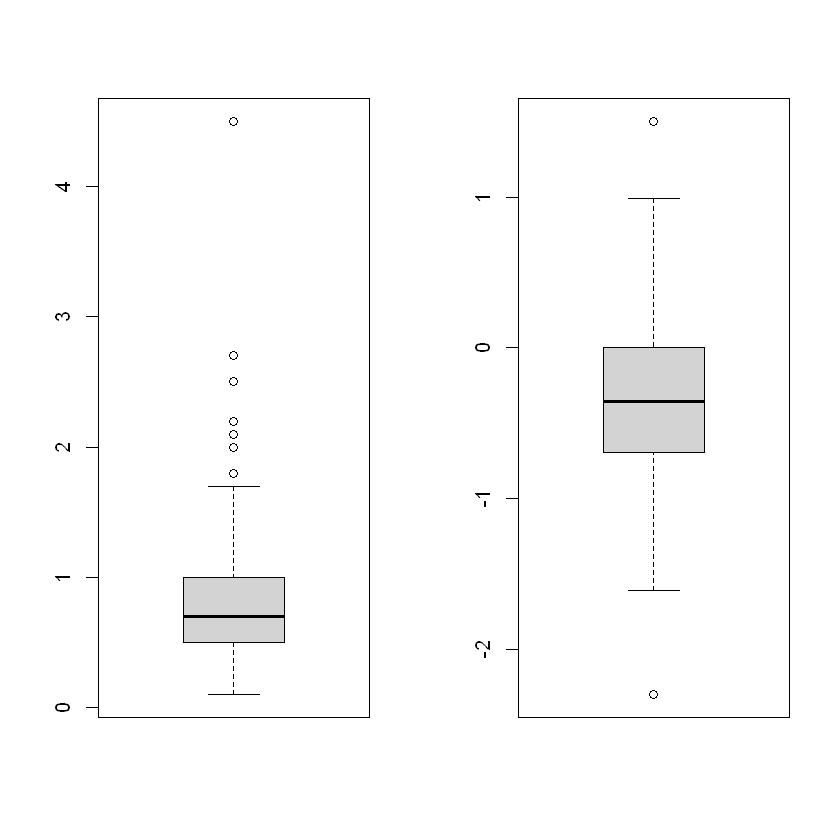

In [22]:
par(mfrow=c(1,2))
boxplot(IgM)
boxplot(log(IgM))
par(mfrow=c(1,1))

### 3. Summary statistics by groups(그룹별 통계 요약)

- When dealing with grouped data, you will often want to have various summary statistics computed within groups; for example, a table of means and standard deviations.

In [23]:
attach(red.cell.folate)
head(red.cell.folate, 3)
tapply(folate, ventilation, mean)
tapply(folate, ventilation, sd)
tapply(folate, ventilation, length)

,folate,ventilation
,<dbl>,<fct>
1,243,"N2O+O2,24h"
2,251,"N2O+O2,24h"
3,275,"N2O+O2,24h"


N2O+O2,24h  N2O+O2,op     O2,24h 
  316.6250   256.4444   278.0000

N2O+O2,24h  N2O+O2,op     O2,24h 
  58.71709   37.12180   33.75648

N2O+O2,24h  N2O+O2,op     O2,24h 
         8          9          5

In [24]:
xbar <- tapply(folate, ventilation, mean)
s <- tapply(folate, ventilation, sd)
n <- tapply(folate, ventilation, length)
cbind(mean=xbar, std.dev=s, n=n)

,mean,std.dev,n
"N2O+O2,24h",316.6250,58.71709,8
"N2O+O2,op",256.4444,37.12180,9
"O2,24h",278.0000,33.75648,5


- For the juul data

In [25]:
data(juul)
attach(juul)
tapply(igf1, tanner, mean)
tapply(igf1, tanner, mean, na.rm=T)

The following objects are masked from juul (pos = 4):

    age, igf1, menarche, sex, tanner, testvol




1  2  3  4  5 
NA NA NA NA NA

1        2        3        4        5 
207.4727 352.6714 483.2222 513.0172 465.3344

- The functions aggregate and by are variations on the same topic.

In [26]:
aggregate(juul[c('age', 'igf1')], list(sex=juul$sex), mean, na.rm=T)

sex,age,igf1
<dbl>,<dbl>,<dbl>
1,15.38436,310.8866
2,14.84363,368.1006


In [27]:
by(juul, juul['sex'], summary)

sex: 1
      age           menarche        sex         igf1           tanner     
 Min.   : 0.17   Min.   : NA   Min.   :1   Min.   : 29.0   Min.   :1.000  
 1st Qu.: 8.85   1st Qu.: NA   1st Qu.:1   1st Qu.:176.0   1st Qu.:1.000  
 Median :12.38   Median : NA   Median :1   Median :280.0   Median :1.000  
 Mean   :15.38   Mean   :NaN   Mean   :1   Mean   :310.9   Mean   :2.361  
 3rd Qu.:16.77   3rd Qu.: NA   3rd Qu.:1   3rd Qu.:430.2   3rd Qu.:4.000  
 Max.   :83.00   Max.   : NA   Max.   :1   Max.   :915.0   Max.   :5.000  
                 NA's   :621               NA's   :145     NA's   :76     
    testvol      
 Min.   : 1.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 7.896  
 3rd Qu.:15.000  
 Max.   :30.000  
 NA's   :141     
------------------------------------------------------------ 
sex: 2
      age           menarche          sex         igf1           tanner     
 Min.   : 0.25   Min.   :1.000   Min.   :2   Min.   : 25.0   Min.   :1.000  
 1st Qu.: 9.30   1st Qu.:1

### 4. Graphics for grouped data

- In dealing with grouped data, it is important to be able not only to create plots for each group but also to compare the plots between groups.
- 그룹화된 데이터를 처리할 때는 각 그룹에 대한 그래프를 생성할 뿐만 아니라 그룹간의 그래프를 비교할 수 있는 능력이 중요합니다

#### Histograms

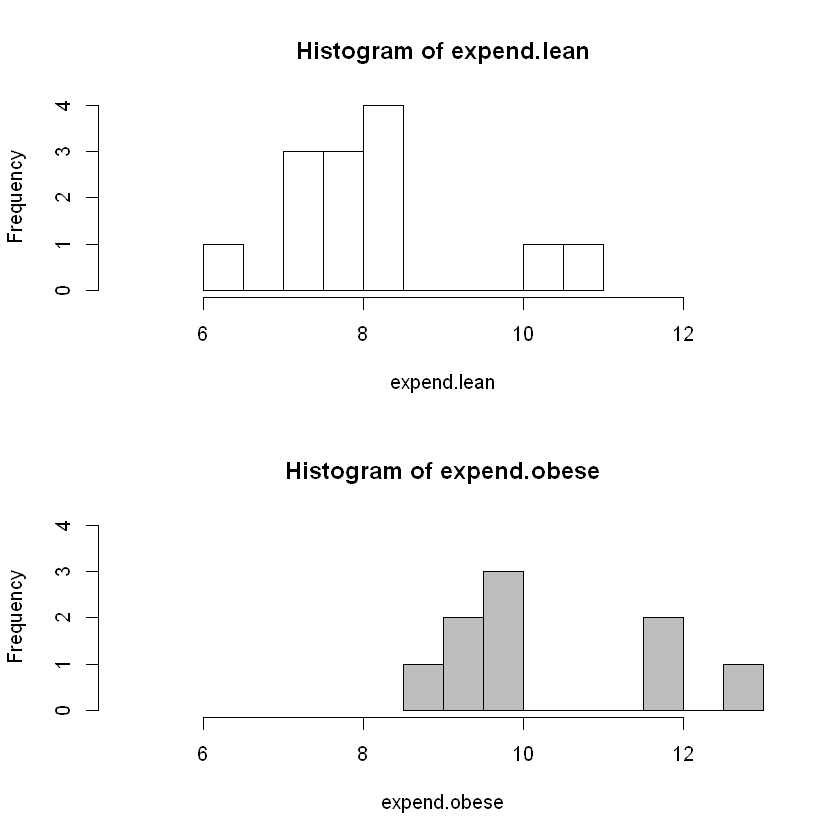

In [28]:
attach(energy)
expend.lean <- expend[stature=='lean']
expend.obese <- expend[stature=='obese']
par(mfrow=c(2,1))
hist(expend.lean, breaks=10, xlim=c(5,13), ylim=c(0,4), col='white')
hist(expend.obese, breaks=10, xlim=c(5,13), ylim=c(0,4), col='gray')

#### Parallel boxplots

- You might want a set of boxplots from several groups in the same frame.

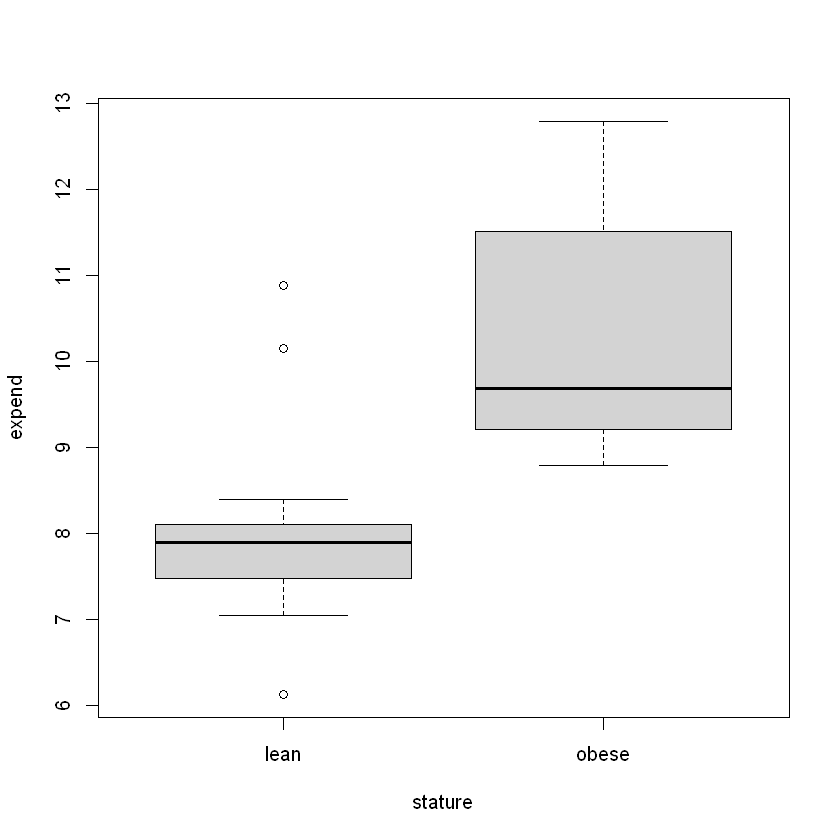

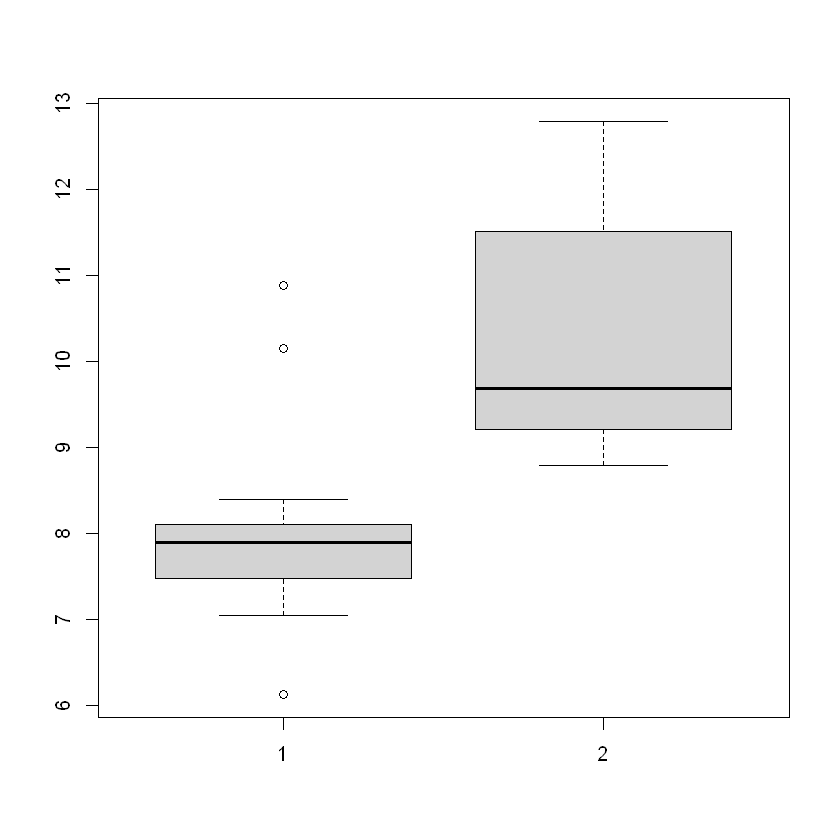

In [29]:
boxplot(expend ~ stature) # 1
boxplot(expend.lean, expend.obese) #2

#### Stripcharts(줄기그림)

- With groups as small as these, the quartiles will be quite inaccurately determined, and it may therefore be more desirable to plot the raw data.
- 이처럼 작은 그룹의 경우 사분위수는 상당히 부정확하게 결정될 수 있으므로, 원시 데이터를 그래픽으로 표시하는 것이 더 바람직할 수 있습니다.


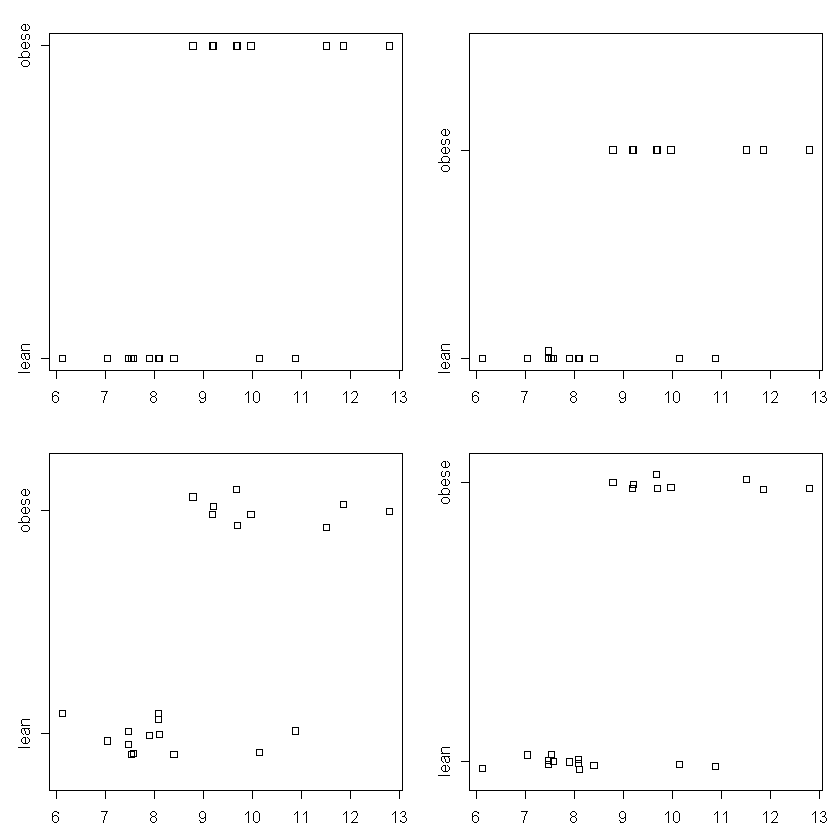

In [30]:
opar <- par(mfrow=c(2,2), mex=0.8, mar=c(3,3,2,1)+.1)
stripchart(expend ~ stature)
stripchart(expend ~ stature, method='stack')
stripchart(expend ~ stature, method='jitter')
stripchart(expend ~ stature, method='jitter', jitter=0.03)
par(opar)